In [2]:
!pip install scipy

# Load packages and dependencies

In [9]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

import numpy as np
from scipy.io.wavfile import write

import librosa

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Connect the drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the raw data

In [5]:
DATASET_PATH = "/content/drive/My Drive/dataset/luganda_data_set"
data_dir = pathlib.Path(DATASET_PATH)

In [12]:
def preprocess_wav_directory(directory, target_sr=16000):
    preprocessed_data = []

    # Loop through all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)

        # Load and preprocess each audio file
        audio = preprocess_wav(file_path, target_sr)
        preprocessed_data.append(audio)

    return preprocessed_data

# Example usage
preprocessed_data = preprocess_wav_directory(DATASET_PATH)

data_dir = pathlib.Path(preprocessed_audio)

<ipython-input-11-342d96d0c8dc>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=target_sr, mono=True)


IsADirectoryError: ignored

In [10]:
# Example usage


<ipython-input-7-08b257e510a1>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=target_sr, mono=True)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


IsADirectoryError: ignored

# Labels

In [4]:
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[(commands != 'README.md') & (commands != '.DS_Store')]
print('Commands:', commands)

Commands: ['mu masso' 'emabega' 'yimirira' 'ddyo' 'kkono' 'gaali']


# Preprocess the data

In [5]:
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset='both')

label_names = np.array(train_ds.class_names)
print()
print("label names:", label_names)

Found 895 files belonging to 6 classes.
Using 716 files for training.
Using 179 files for validation.

label names: ['ddyo' 'emabega' 'gaali' 'kkono' 'mu masso' 'yimirira']


### shape

In [6]:
train_ds.element_spec

(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

### This dataset only contains single channel audio, so use the `tf.squeeze` function to drop the extra axis:

In [20]:
def squeeze(audio, labels):
    # Decode the WAV file with the desired parameters
    audio, sample_rate = tf.audio.decode_wav(audio, desired_channels=1, desired_samples=16000)

    # Cast the audio data to int16
    audio = tf.cast(audio, tf.int16)

    # Squeeze the audio tensor
    audio = tf.squeeze(audio, axis=-1)

    return audio, labels


In [21]:
test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Commands: ['mu masso' 'emabega' 'yimirira' 'ddyo' 'kkono' 'gaali']
Found 895 files belonging to 6 classes.
Using 716 files for training.
Using 179 files for validation.

label names: ['ddyo' 'emabega' 'gaali' 'kkono' 'mu masso' 'yimirira']


TypeError: ignored

In [22]:
for example_audio, example_labels in train_ds.take(1):
  print(example_audio.shape)
  print(example_labels.shape)

InvalidArgumentError: ignored

## plot a audio waveforms:

In [ ]:
label_names[[1,2,3,0,4,5]]

array(['emabega', 'gaali', 'kkono', 'ddyo', 'mu masso', 'yimirira'],
      dtype='<U8')

NameError: ignored

Exception ignored in: <function _xla_gc_callback at 0x7e3ba5efa320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


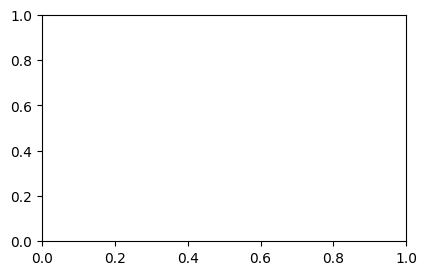

In [ ]:
plt.figure(figsize=(16, 10))
rows = 3
cols = 3
n = rows * cols
for i in range(n):
  plt.subplot(rows, cols, i+1)
  audio_signal = example_audio[i]
  plt.plot(audio_signal)
  plt.title(label_names[example_labels[i]])
  plt.yticks(np.arange(-1.2, 1.2, 0.2))
  plt.ylim([-1.1, 1.1])

## Save the mfcc data

In [ ]:
data = save_mfcc(DATASET_PATH, JSON_PATH, num_segments=6)


Processing: mu masso
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-12.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-12.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-12.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-12.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-14.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-14.wav

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1102
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=529
  warnings.warn(



/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-14.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-29.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-29.wav, segment:2


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=881
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-29.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-29.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-36.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-36.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-36.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-36.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-36.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-56.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-56.wav, segment:2


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=132
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=616
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-62.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-62.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-62.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-62.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-73.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-73.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-73.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:2


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1057
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=749
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-88.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-88.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-88.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-95.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-95.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-95.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-95.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-95.wav, segment:5
/con

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=220
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=309
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-123.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-123.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-131.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-131.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-131.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-137.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-137.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-137.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-137.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-137.wav, segment:5


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=660
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=396
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1058
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-143.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-143.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-143.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-149.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-149.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-149.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-149.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-149.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-150.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-150.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-150.wav, segment:3


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=837
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=838
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-150.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-150.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-157.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-157.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-159.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-159.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-159.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-159.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-159.wav, segment:5


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=439
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-159.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-165.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-165.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-165.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-165.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-165.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-165.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-172.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-172.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-172.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-172.wav, segment:4


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=352
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1014
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=440
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-179.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-179.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-179.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-179.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-179.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-188.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-188.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-188.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-188.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-193.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-193.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-193.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=44
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=484
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-203.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-203.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-209.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-209.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-209.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-214.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-214.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-214.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-214.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-214.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-222.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-222.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=750
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=661
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1101
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-280.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-280.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-280.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-285.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-285.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-285.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-285.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-285.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-289.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-289.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-289.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-289.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=43
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=88
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=617
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-407.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-407.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-407.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-407.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-412.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-412.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-412.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-412.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-416.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-416.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-416.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-416.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=705
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=970
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-455.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-455.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-455.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-455.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-455.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-463.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-463.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-463.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-463.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-463.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-468.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-468.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=397
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-482.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-482.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-482.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-482.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-482.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-482.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-487.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-487.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-487.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-487.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-487.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-487.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=793
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-529.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-529.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-529.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-529.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-529.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-530.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-530.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-530.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-530.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-530.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-539.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-539.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=926
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=485
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-583.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-583.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-583.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-583.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-584.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-584.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-584.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-584.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-585.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-585.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-585.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-585.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=925
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=176
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=264
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-644.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-645.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-645.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-645.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-645.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-645.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-662.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-662.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-662.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-663.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-663.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-663.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1013
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=308
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-665.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-665.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-665.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-665.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-680.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-680.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-680.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-680.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-681.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-681.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-681.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-681.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=572
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-759.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-759.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-759.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-760.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-760.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-760.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-760.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-769.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-769.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-769.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-769.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-769.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=663
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=222
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_105.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_105.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_29.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_29.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_29.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_29.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_29.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_29.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_64.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_64.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_64.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu 

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=223
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=443
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=664
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_42.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_42.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_44.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_44.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_44.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_71.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_71.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_71.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_71.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_81.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_81.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu ma

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=3
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=884
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-24.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-24.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-24.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-24.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-24.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-24.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-30.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-30.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-30.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-30.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-30.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-37.wav, segment:1
/content/drive/M

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=573
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-117.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-124.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-124.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-124.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-124.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-132.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-132.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-132.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-138.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-138.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-138.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-138.wav, segment:4
/con

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=219
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-515.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-515.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-515.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-515.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-531.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-531.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-531.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-531.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-532.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-532.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-532.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-532.wav, segment:4
/con

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=444
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_74.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_74.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_74.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_74.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_74.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_48.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_48.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_48.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_107.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_107.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_107.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recor

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_13.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_138.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_138.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_138.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_52.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_52.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_52.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_25.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_25.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_25.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_25.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recor

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=880
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-534.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-534.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-534.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-534.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-534.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-535.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-535.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-535.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-535.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-535.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-541.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-541.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=131
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-565.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-565.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-565.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-590.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-590.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-590.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-590.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-591.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-591.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-591.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-591.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-609.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=442
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_75.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_75.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_75.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_100.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_100.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_100.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_100.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_109.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_109.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_109.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_128.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_s

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=883
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_24.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_24.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_24.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_24.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_24.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_24.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_127.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_127.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_127.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_127.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_127.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=792
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-113.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-113.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-119.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-119.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-119.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-126.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-126.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-126.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-126.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-134.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-134.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-134.wav, segment:3
/content/drive/My Drive/dataset/luganda_

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=969
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-284.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-284.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-284.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-284.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-288.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-288.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-288.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-288.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-293.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-293.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-293.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-293.wav, segment:4
/content/drive/My Drive/dataset/luganda_

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=885
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_70.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_63.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_63.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_63.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_63.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_63.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_80.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_80.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_80.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_89.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_89.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_7.wav, segment:1
/content/drive/My

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=704
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-64.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-64.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-64.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-64.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-75.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-75.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-75.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-83.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-83.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-83.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-83.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-90.wav, segment:1
/content/drive/My Drive/dataset/luganda_

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=836
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=351
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-843.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-845.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-845.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-845.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-845.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-846.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-846.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-846.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-861.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-861.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-861.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-861.wav, segment:4
/content/drive/My Drive/data

## Load json file

In [ ]:
def load_data(data):

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data successfully loaded!")

    return X, y


In [ ]:
X, y = load_data(data)

Data successfully loaded!


# Split Data into Training and Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

NameError: ignored

# Build a Neural Network Model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

## Compile the model

In [ ]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 39)                0         
                                                                 
 dense_32 (Dense)            (None, 512)               20480     
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 dense_33 (Dense)            (None, 256)               131328    
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 64)                16448     
                                                                 
 dropout_23 (Dropout)        (None, 64)               

# Train the Model

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=50)

Epoch 1/50
83/83 [==============================] - 2s 13ms/step - loss: 16.6986 - accuracy: 0.1320 - val_loss: 3.4258 - val_accuracy: 0.2120
Epoch 2/50
83/83 [==============================] - 1s 12ms/step - loss: 7.7374 - accuracy: 0.1626 - val_loss: 2.6927 - val_accuracy: 0.1821
Epoch 3/50
83/83 [==============================] - 1s 13ms/step - loss: 5.1712 - accuracy: 0.1456 - val_loss: 2.7496 - val_accuracy: 0.2040
Epoch 4/50
83/83 [==============================] - 1s 12ms/step - loss: 4.0802 - accuracy: 0.1520 - val_loss: 2.7671 - val_accuracy: 0.1970
Epoch 5/50
83/83 [==============================] - 1s 13ms/step - loss: 3.5055 - accuracy: 0.1505 - val_loss: 2.7662 - val_accuracy: 0.1856
Epoch 6/50
83/83 [==============================] - 1s 12ms/step - loss: 3.3203 - accuracy: 0.1618 - val_loss: 2.7614 - val_accuracy: 0.1785
Epoch 7/50
83/83 [==============================] - 1s 12ms/step - loss: 3.1004 - accuracy: 0.1573 - val_loss: 2.7552 - val_accuracy: 0.1733
Epoch 8/50
8

## History

In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

## Plot history

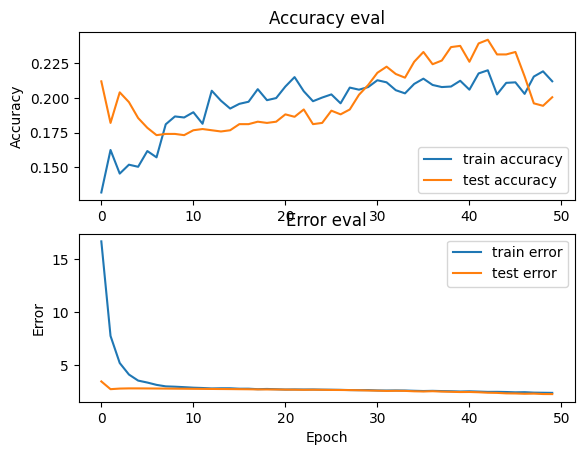

In [ ]:
plot_history(history)

# Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')
print(f'\nTest loss: {test_loss}')

36/36 - 0s - loss: 2.2270 - accuracy: 0.2005 - 148ms/epoch - 4ms/step

Test accuracy: 0.20052769780158997

Test loss: 2.227047920227051


# Make Predictions

In [ ]:
predictions = model.predict(X_test)

36/36 [==============================] - 0s 2ms/step


# Post-Processing and Analysis

# Save and Export Model

In [ ]:
model.save('audio_model.h5')